In [1]:
# Módulos necesarios
!pip install scikit-learn imblearn
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import expon, reciprocal
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import f1_score

# Clasificadores
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [2]:
# Cargamos datos de csv
data = pd.read_csv('../train.csv') # set de entrenamiento
test = pd.read_csv('../test.csv') # set de test

In [3]:
data.describe()

,age,sex,cp,restecg,label
count,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,0.789617,3.250000,0.602459,1.132514
std,9.306868,0.407859,0.923363,0.802966,1.257615
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,2.000000
max,76.000000,1.000000,4.000000,2.000000,4.000000


In [4]:
test.describe()

,age,sex,cp
count,184.000000,184.000000,184.000000
mean,54.179348,0.782609,3.277174
std,9.747938,0.413596,0.937571
min,29.000000,0.000000,1.000000
25%,47.750000,1.000000,3.000000
50%,54.500000,1.000000,4.000000
75%,61.000000,1.000000,4.000000
max,77.000000,1.000000,4.000000


In [5]:
# Quitamos los duplicados y comprobamos
data = data.drop_duplicates(keep = False)
test = test.drop_duplicates(keep = False)
data.describe()

,age,sex,cp,restecg,label
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,53.376712,0.791781,3.253425,0.604110,1.135616
std,9.316814,0.406313,0.922301,0.803446,1.257937
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,2.000000
max,76.000000,1.000000,4.000000,2.000000,4.000000


In [6]:
test.describe()

,age,sex,cp
count,184.000000,184.000000,184.000000
mean,54.179348,0.782609,3.277174
std,9.747938,0.413596,0.937571
min,29.000000,0.000000,1.000000
25%,47.750000,1.000000,3.000000
50%,54.500000,1.000000,4.000000
75%,61.000000,1.000000,4.000000
max,77.000000,1.000000,4.000000


In [7]:
# Buscamos valores únicos en cada variable:

print(f'\nTRAIN SET\n')

for column in data.columns:
    valores_unicos = data[column].unique()
    print(f"Valores únicos en la columna '{column}': {valores_unicos}")

print(f'\nTEST SET\n')

for column in test.columns:
    valores_unicos = test[column].unique()
    print(f"Valores únicos en la columna '{column}': {valores_unicos}")



TRAIN SET

Valores únicos en la columna 'age': [51. 54. 63. 52. 55. 44. 35. 62. 68. 50. 38. 64. 56. 61. 60. 59. 45. 53.
 43. 47. 41. 69. 49. 66. 57. 46. 67. 58. 42. 31. 39. 65. 37. 48. 40. 36.
 33. 70. 34. 76. 71. 29. 32. 74. 73. 72. 30. 75. 28.]
Valores únicos en la columna 'sex': [1. 0.]
Valores únicos en la columna 'cp': [1. 3. 4. 2.]
Valores únicos en la columna 'trestbps': ['125.0' '120.0' '140' '140.0' '122.0' '135' '100' '130.0' '120' '104.0'
 '124' '96' '?' '160.0' '110.0' '134' '134.0' '125' '160' '146.0' '128.0'
 '105' '190' '108.0' '115' '115.0' '150' '112' '100.0' '135.0' '150.0'
 '178' '132.0' '145.0' '130' '110' '170.0' '155' '138.0' '144.0' '180.0'
 '95' '112.0' '122' '105.0' '190.0' '155.0' '170' '117.0' '142' '192.0'
 '114.0' '142.0' '158' '148.0' '172' '124.0' '154' '128' '152.0' '145'
 '118.0' '106.0' '165.0' '132' '172.0' '114' '144' '102.0' '113.0' '174.0'
 '126' '180' '146' '126.0' '154.0' '116' '127' '185' '200.0' '136.0' '118'
 '165' '136' '94.0' '152' '104' '0

In [8]:
# Reemplazamos los valores no imputados ('?', valores no posibles donde corresponda)

# Reemplazamos '?' por NaN en todos los dataset

data.replace('?', np.nan, inplace=True)
test.replace('?', np.nan, inplace=True)

# Reemplazamos '0' por NaN en las columnas 'trestbps', 'chol', 'slope' y 'thal'

# Especificamos las columnas donde reemplazar
columns_to_replace = ['trestbps', 'chol', 'slope', 'thal']
all_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Reemplazamos '0', '0.0' por NaN
for column in columns_to_replace:
    # Set de entrenamiento
    data[column] = data[column].replace([0, '0', 0.0, '0.0'], np.nan)
    
    # Set de test
    test[column] = test[column].replace([0, '0', 0.0, '0.0'], np.nan)

# Reemplazamos todos los valores negativos en los dataset por NaN
for column in all_columns:
    # Set de entrenamiento
    data[column] = data[column].astype(float)
    data[column] = data[column].apply(lambda x: np.nan if x < 0 else x)
    # Set de test
    test[column] = test[column].astype(float)
    test[column] = test[column].apply(lambda x: np.nan if x < 0 else x)

# Finalmente, llenamos todas las entradas vacías con NaN

# Set de entrenamiento
data.replace(" ", np.nan, inplace=True)
data.replace("", np.nan, inplace=True)
# Set de test
test.replace(" ", np.nan, inplace=True)
test.replace("", np.nan, inplace=True)



In [9]:
# Comprobamos datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       730 non-null    float64
 1   sex       730 non-null    float64
 2   cp        730 non-null    float64
 3   trestbps  682 non-null    float64
 4   chol      576 non-null    float64
 5   fbs       664 non-null    float64
 6   restecg   730 non-null    float64
 7   thalach   686 non-null    float64
 8   exang     686 non-null    float64
 9   oldpeak   671 non-null    float64
 10  slope     485 non-null    float64
 11  ca        253 non-null    float64
 12  thal      353 non-null    float64
 13  label     730 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 85.5 KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    float64
 1   sex       184 non-null    float64
 2   cp        184 non-null    float64
 3   trestbps  172 non-null    float64
 4   chol      139 non-null    float64
 5   fbs       161 non-null    float64
 6   restecg   182 non-null    float64
 7   thalach   173 non-null    float64
 8   exang     173 non-null    float64
 9   oldpeak   169 non-null    float64
 10  slope     123 non-null    float64
 11  ca        56 non-null     float64
 12  thal      80 non-null     float64
dtypes: float64(13)
memory usage: 20.1 KB


In [11]:
# Comprobamos entradas por cada valor único en cada dataset

print(f'\nTRAINING SET\n')
for column in all_columns:
    print(data[column].value_counts(dropna = False))

print(f'\nTEST SET\n')
for column in all_columns:
    print(test[column].value_counts(dropna = False))


TRAINING SET

54.0    38
58.0    36
56.0    34
57.0    33
52.0    29
55.0    29
59.0    29
53.0    27
51.0    27
62.0    26
61.0    25
41.0    24
63.0    24
60.0    24
48.0    23
50.0    21
49.0    20
46.0    20
43.0    19
64.0    17
42.0    15
44.0    15
65.0    14
45.0    14
47.0    13
39.0    13
38.0    12
66.0    12
69.0    12
37.0    10
67.0     9
68.0     9
35.0     8
40.0     7
36.0     6
70.0     5
34.0     5
71.0     4
74.0     4
32.0     3
75.0     3
72.0     2
31.0     2
29.0     2
76.0     2
73.0     1
30.0     1
33.0     1
28.0     1
Name: age, dtype: int64
1.0    578
0.0    152
Name: sex, dtype: int64
4.0    391
3.0    168
2.0    136
1.0     35
Name: cp, dtype: int64
120.0    109
130.0     88
140.0     78
NaN       48
150.0     42
110.0     42
160.0     41
125.0     24
135.0     17
128.0     15
100.0     14
115.0     14
170.0     12
112.0     12
122.0     11
145.0     11
124.0     11
180.0     11
132.0     10
118.0      9
134.0      9
138.0      9
105.0      7
142.0     

In [12]:
# Valor suelto en set de test, columna 'ca'
test['ca'] = test['ca'].replace(9.0, 0.0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       730 non-null    float64
 1   sex       730 non-null    float64
 2   cp        730 non-null    float64
 3   trestbps  682 non-null    float64
 4   chol      576 non-null    float64
 5   fbs       664 non-null    float64
 6   restecg   730 non-null    float64
 7   thalach   686 non-null    float64
 8   exang     686 non-null    float64
 9   oldpeak   671 non-null    float64
 10  slope     485 non-null    float64
 11  ca        253 non-null    float64
 12  thal      353 non-null    float64
 13  label     730 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 85.5 KB


In [14]:
# Comprobamos de nuevo entradas por cada valor único en cada dataset

print(f'\nTRAINING SET\n')
for column in all_columns:
    print(data[column].value_counts(dropna = False))

print(f'\nTEST SET\n')
for column in all_columns:
    print(test[column].value_counts(dropna = False))


TRAINING SET

54.0    38
58.0    36
56.0    34
57.0    33
52.0    29
55.0    29
59.0    29
53.0    27
51.0    27
62.0    26
61.0    25
41.0    24
63.0    24
60.0    24
48.0    23
50.0    21
49.0    20
46.0    20
43.0    19
64.0    17
42.0    15
44.0    15
65.0    14
45.0    14
47.0    13
39.0    13
38.0    12
66.0    12
69.0    12
37.0    10
67.0     9
68.0     9
35.0     8
40.0     7
36.0     6
70.0     5
34.0     5
71.0     4
74.0     4
32.0     3
75.0     3
72.0     2
31.0     2
29.0     2
76.0     2
73.0     1
30.0     1
33.0     1
28.0     1
Name: age, dtype: int64
1.0    578
0.0    152
Name: sex, dtype: int64
4.0    391
3.0    168
2.0    136
1.0     35
Name: cp, dtype: int64
120.0    109
130.0     88
140.0     78
NaN       48
150.0     42
110.0     42
160.0     41
125.0     24
135.0     17
128.0     15
100.0     14
115.0     14
170.0     12
112.0     12
122.0     11
145.0     11
124.0     11
180.0     11
132.0     10
118.0      9
134.0      9
138.0      9
105.0      7
142.0     

In [15]:
# Ahora, probamos estrategias para inputar valores en los NaNs

# Inicializamos SimpleImputer
imputer = SimpleImputer(strategy='median')

columns_imputer = ['trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak']
columns_ml = ['chol', 'slope', 'ca', 'thal']

# Hacemos fit a SimpleImputer y computamos
data[columns_imputer] = imputer.fit_transform(data[columns_imputer])
test[columns_imputer] = imputer.transform(test[columns_imputer])

In [16]:
# Ahora, aplicamos un modelo ML (Iterative Imputer) para las columnas más 'dañadas'

# Initialize the Iterative Imputer
iterative_imputer = IterativeImputer()

# Apply the imputer to the dataset
data[columns_ml] = iterative_imputer.fit_transform(data[columns_ml])
test[columns_ml] = iterative_imputer.transform(test[columns_ml])


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       730 non-null    float64
 1   sex       730 non-null    float64
 2   cp        730 non-null    float64
 3   trestbps  730 non-null    float64
 4   chol      730 non-null    float64
 5   fbs       730 non-null    float64
 6   restecg   730 non-null    float64
 7   thalach   730 non-null    float64
 8   exang     730 non-null    float64
 9   oldpeak   730 non-null    float64
 10  slope     730 non-null    float64
 11  ca        730 non-null    float64
 12  thal      730 non-null    float64
 13  label     730 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 85.5 KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    float64
 1   sex       184 non-null    float64
 2   cp        184 non-null    float64
 3   trestbps  184 non-null    float64
 4   chol      184 non-null    float64
 5   fbs       184 non-null    float64
 6   restecg   184 non-null    float64
 7   thalach   184 non-null    float64
 8   exang     184 non-null    float64
 9   oldpeak   184 non-null    float64
 10  slope     184 non-null    float64
 11  ca        184 non-null    float64
 12  thal      184 non-null    float64
dtypes: float64(13)
memory usage: 20.1 KB


In [19]:
# Exploramos la variable 'sex' para ver si está balanceada

# sex_counts = data['sex'].value_counts()

# Histograma
# plt.figure(figsize=(8, 6))
# sex_counts.plot(kind='bar')
# plt.title('Distribution of Sex')
# plt.xlabel('Sex')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1], labels=['Sex 0', 'Sex 1'], rotation=0) # Adjust labels as needed
# plt.show()

In [20]:
# Aplicamos one-hot encoding a las variables categóricas
data = pd.get_dummies(data)
test = pd.get_dummies(test)


In [21]:
# Generamos una matriz de correlación para ver interacciones entre predictores
correlation_matrix = data.corr(method='kendall')

# Mostramos la matriz de correlación
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.026652  0.127946  0.180548  0.078482  0.175550   
sex       0.026652  1.000000  0.176009  0.008044 -0.055934  0.049807   
cp        0.127946  0.176009  1.000000  0.017548  0.061943  0.019897   
trestbps  0.180548  0.008044  0.017548  1.000000  0.031703  0.143379   
chol      0.078482 -0.055934  0.061943  0.031703  1.000000  0.047377   
fbs       0.175550  0.049807  0.019897  0.143379  0.047377  1.000000   
restecg   0.160159 -0.023402  0.025953  0.069953  0.058589  0.147143   
thalach  -0.217599 -0.137329 -0.306587 -0.071851 -0.033835  0.001589   
exang     0.115559  0.135904  0.401939  0.109181  0.078515 -0.014303   
oldpeak   0.199615  0.123734  0.237881  0.087247  0.061194  0.052556   
slope     0.117609  0.079683  0.200801  0.047368  0.141160  0.059173   
ca        0.175051  0.077734  0.167507  0.037840  0.275538  0.111064   
thal      0.089910  0.215580  0.214817  0.048792 -0.152785  0.03

Observamos dos cosas:
1. 'sex' no está balanceada 0 = 578, 1 = 152
2. Tiene cierta correlación con 'cp', 'thalach', 'exang', 'oldpeak', 'thal' y 'label'.

Vamos a ver cómo balancearla:

In [22]:
# Generamos una matriz de correlación para ver interacciones entre predictores en el set de test
correlation_matrix = test.corr(method='kendall')

# Mostramos la matriz de correlación
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.137410  0.147354  0.143122  0.021933  0.186629   
sex       0.137410  1.000000  0.165143  0.011807 -0.073979  0.170534   
cp        0.147354  0.165143  1.000000  0.077786  0.041752  0.068566   
trestbps  0.143122  0.011807  0.077786  1.000000  0.085716  0.022152   
chol      0.021933 -0.073979  0.041752  0.085716  1.000000 -0.053555   
fbs       0.186629  0.170534  0.068566  0.022152 -0.053555  1.000000   
restecg   0.267308  0.047281  0.116108  0.067791  0.037079  0.132202   
thalach  -0.268168 -0.190414 -0.178965 -0.006279 -0.005240 -0.111029   
exang     0.188645  0.223018  0.382044  0.185357  0.046380  0.048650   
oldpeak   0.213987 -0.005845  0.303907  0.146843  0.002445  0.039242   
slope     0.128477  0.074313  0.250172  0.071868  0.096795  0.069713   
ca        0.115625  0.197852  0.199200  0.014715  0.333952  0.012515   
thal      0.114990  0.305539  0.187234  0.095291 -0.084373  0.13

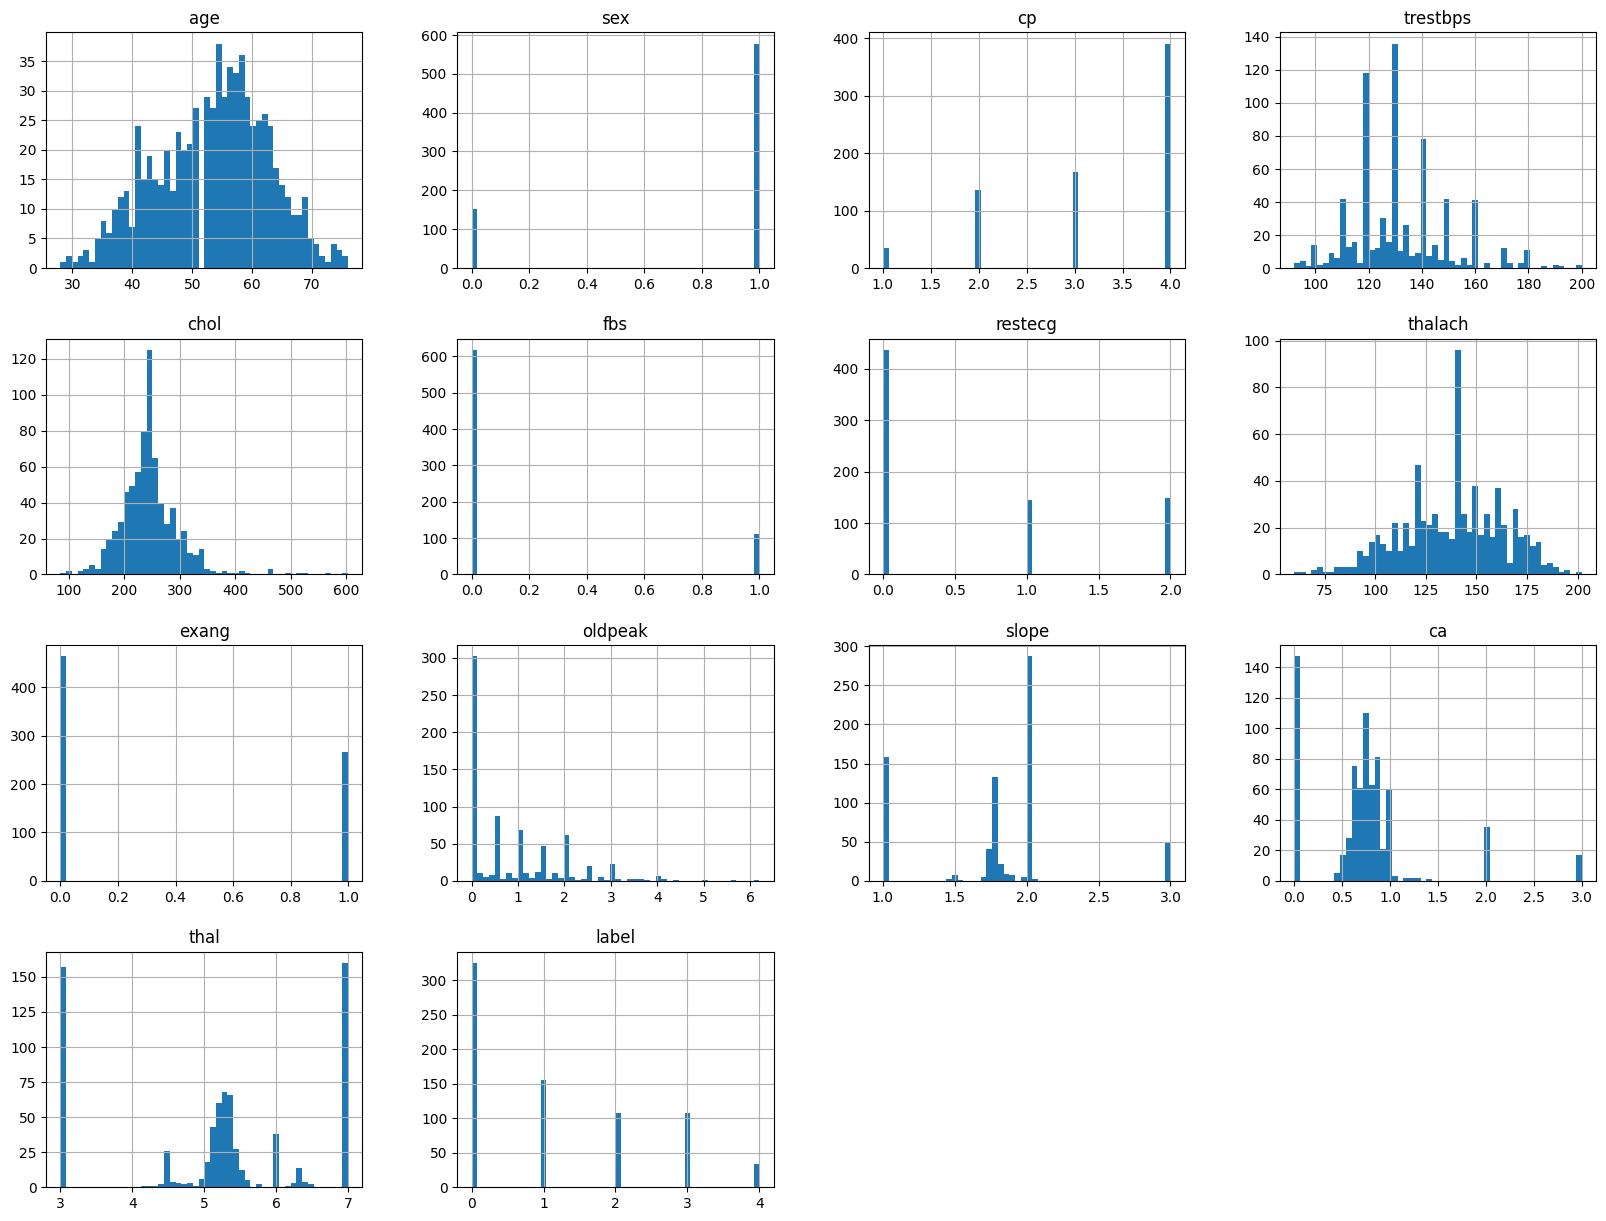

In [23]:
# Comprobamos distribución en set de training
data.hist(bins=50, figsize=(20, 15))
plt.show()

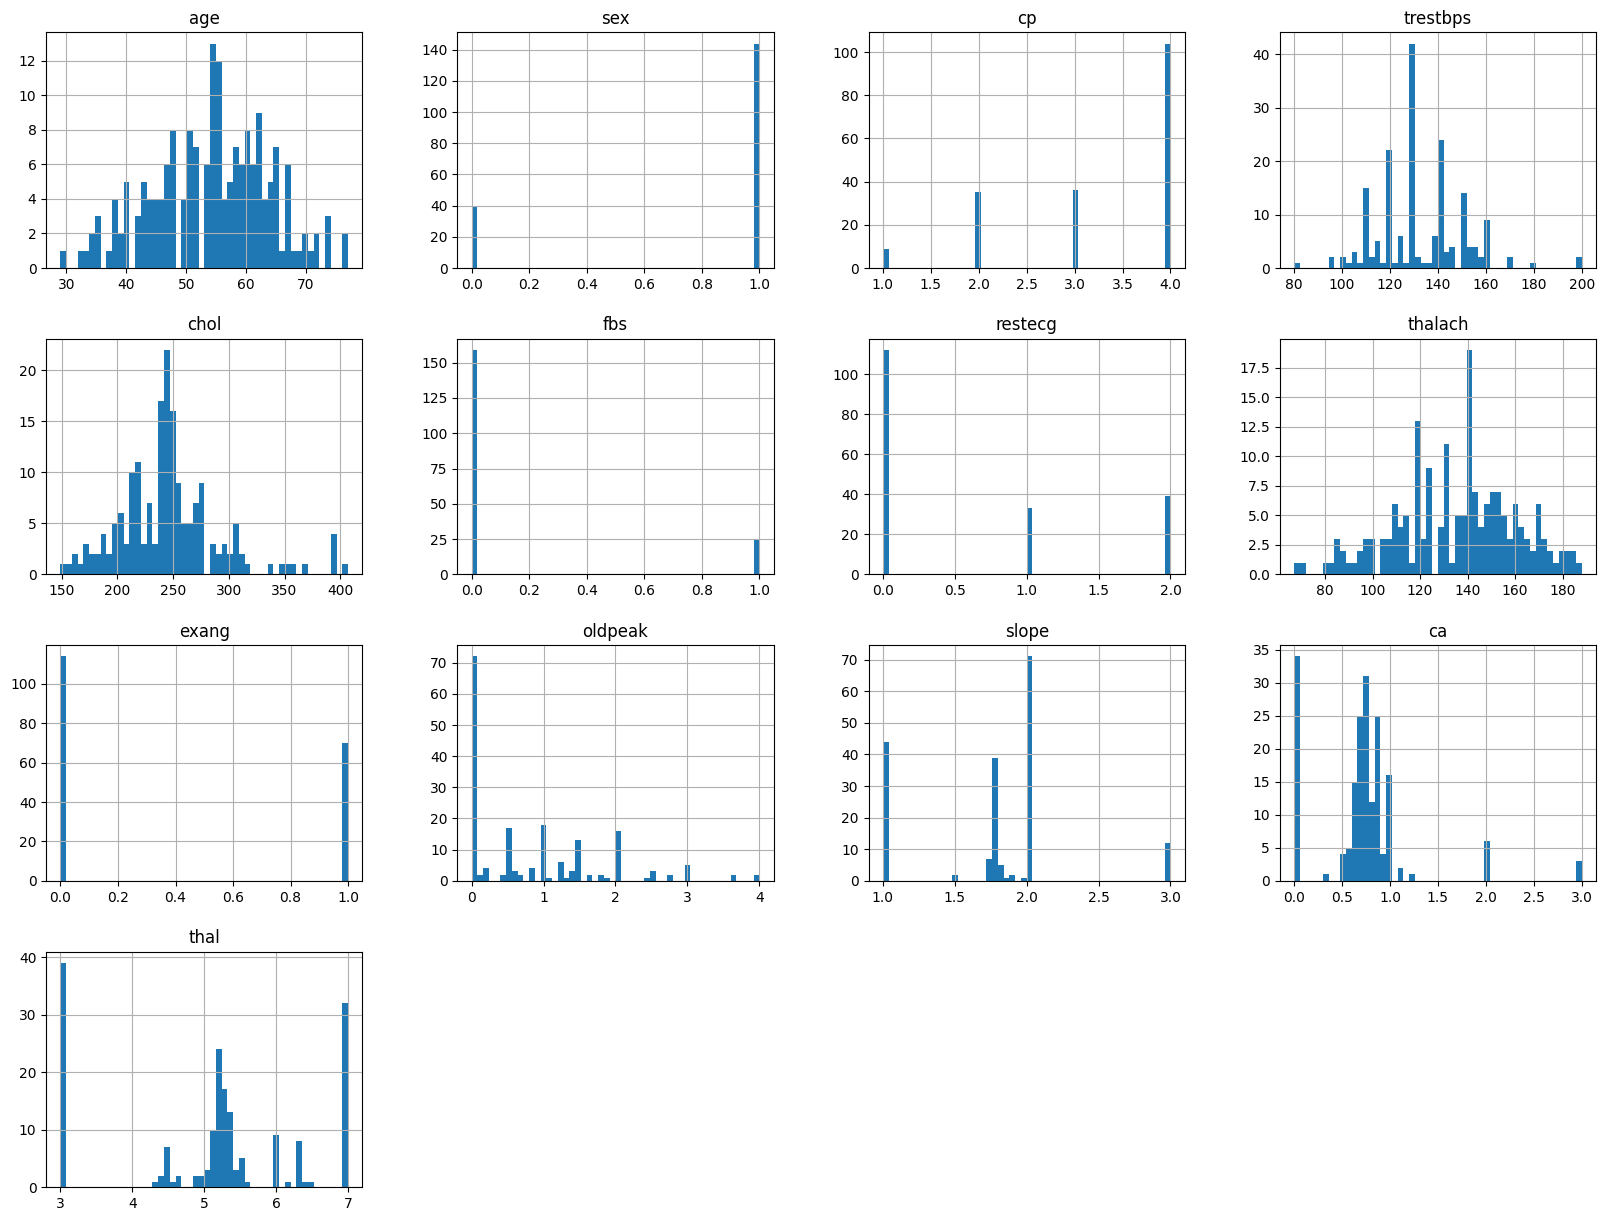

In [24]:
# Comprobamos distribución en set de test
test.hist(bins=50, figsize=(20, 15))
plt.show()

In [25]:
# En este paso, normalizamos  y estandarizamos los datos según su distribución

cols_gaussian = ['age', 'trestbps', 'chol', 'thalach']
cols_norm = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

scaler_std = StandardScaler()
data[cols_gaussian] = scaler_std.fit_transform(data[cols_gaussian])
test[cols_gaussian] = scaler_std.transform(test[cols_gaussian])

scaler_norm = MinMaxScaler(feature_range=(0, 1))
data[cols_norm] = scaler_norm.fit_transform(data[cols_norm])
test[cols_norm] = scaler_norm.transform(test[cols_norm])

In [26]:
# Dividimos data en sets de predictores y targets
X = data.drop('label', axis=1)  # Features (variables independientes)
y = data['label']  # Variable objetivo (variable dependiente)


In [27]:
# Balancear 'sex' - Método SMOTE

# Aplicamos SMOTE con el fin de equilibrar el dataset con respecto a 'label'
# sm = SMOTE(random_state=42)
# X, y = sm.fit_resample(X, y)

# Combinamos predictores y target en nuevos sets
# balanced_dataset_smote = pd.DataFrame(X, columns=X.columns)
# balanced_dataset_smote['sex'] = y

# Verificamos el equilibrio de 'label'
# print(balanced_dataset_smote['sex'].value_counts())

In [28]:
# print(balanced_dataset_smote)

In [29]:
# Asumiendo que 'data' es tu DataFrame
# cols = list(balanced_dataset_smote.columns)

# Remueve 'sex' de la lista de columnas
# cols.remove('sex')

# Inserta 'sex' en la posición deseada (posición 1 para ser la segunda columna, ya que Python empieza a contar desde 0)
# cols.insert(1, 'sex')

# Reordena el DataFrame usando la nueva lista de columnas
# balanced_dataset_smote = balanced_dataset_smote[cols]

In [30]:
# Exploramos la variable 'sex' para ver comprobar que está balanceada

# sex_counts = balanced_dataset_smote['sex'].value_counts()

# Histograma
# plt.figure(figsize=(8, 6))
# sex_counts.plot(kind='bar')
# plt.title('Distribution of Sex')
# plt.xlabel('Sex')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1], labels=['Sex 0', 'Sex 1'], rotation=0) # Adjust labels as needed
# plt.show()

In [31]:
# Exploramos la variable 'sex' para ver comprobar que está balanceada en el set de test

# sex_counts = test['sex'].value_counts()

# Histograma
# plt.figure(figsize=(8, 6))
# sex_counts.plot(kind='bar')
# plt.title('Distribution of Sex')
# plt.xlabel('Sex')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1], labels=['Sex 0', 'Sex 1'], rotation=0) # Adjust labels as needed
# plt.show()

In [32]:
print(data)

          age  sex        cp  trestbps          chol  fbs  restecg   thalach  \
0   -0.255274  1.0  0.000000 -0.395771 -6.294123e-01  0.0      1.0 -0.523934   
1    0.066945  1.0  0.666667 -0.675022 -1.797936e-01  0.0      0.0  0.469499   
2    1.033603  1.0  1.000000  0.441981 -5.380629e-02  0.0      1.0  0.429762   
3   -0.147868  0.0  0.333333  0.441981 -5.324556e-16  0.0      0.0  0.072126   
4    0.174352  1.0  1.000000  0.441981 -5.544759e-01  0.0      0.0 -1.080256   
..        ...  ...       ...       ...           ...  ...      ...       ...   
727 -0.792306  1.0  0.666667 -0.675022 -3.109324e-01  0.0      0.0  0.469499   
728  0.926196  1.0  0.666667 -0.116520 -7.980194e-01  0.0      0.5  0.072126   
729 -1.114526  0.0  0.666667 -0.563321 -6.294123e-01  0.0      0.0  1.065559   
730  1.570635  1.0  0.666667  1.000482 -9.666264e-01  1.0      0.0 -0.245773   
731 -1.329338  0.0  0.333333 -0.339921  1.112860e+00  0.0      0.0  0.986084   

     exang   oldpeak     slope        c

In [33]:
data['label'] = data['label'].round(0)

In [34]:
# Por alguna razón, después de equilibrar vuelve a aparecer 'label' en X_res
# a pesar de haberla dropeado de X, y no deja dropearla directamente. ¿Problema de memoria?
# X_res2 = X_res.drop('label', axis=1)
# X_res = X_res2
# X_res.head()

In [35]:
# Ahora, dividimos los sets para entrenar y validar
# Dividimos X e y en sets de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
X_test = test

In [37]:
# Crear un clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=5)  # Define el número de vecinos, puedes ajustarlo según sea necesario

# Entrenar el clasificador con los datos de entrenamiento
knn.fit(X_train, y_train)

# Hacer predicciones en los datos de validación
y_pred_knn = knn.predict(X_val)
y_pred_test_knn = knn.predict(X_test)

# Calcular la precisión del modelo
precisionknn = accuracy_score(y_val, y_pred_knn)
print("Precisión del modelo:", precisionknn)

# Calcular la matriz de confusión
matriz_confusionknn = confusion_matrix(y_val, y_pred_knn)
print("Matriz de confusión:")
print(matriz_confusionknn)

# Calcular el F1 score para los datos de validación
f1_score_knn = f1_score(y_val, y_pred_knn, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_knn)

Precisión del modelo: 0.5454545454545454
Matriz de confusión:
[[47  5  2  3  0]
 [ 9  7  3  3  0]
 [ 3  2  3  1  1]
 [ 4  4  5  3  0]
 [ 0  2  1  2  0]]
F1 score del modelo, validación: 0.5264718614718615


In [ ]:
# Crear un clasificador Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Puedes ajustar el número de árboles (n_estimators)

# Entrenar el clasificador con los datos de entrenamiento
random_forest.fit(X_train, y_train)

# Hacer predicciones en los datos de validación
y_pred_rf = random_forest.predict(X_val)

y_pred_test_rf = random_forest.predict(X_test)

# Calcular la precisión del modelo
precisionrf = accuracy_score(y_val, y_pred_rf)
print("Precisión del modelo:", precisionrf)

# Calcular la matriz de confusión
matriz_confusionrf = confusion_matrix(y_val, y_pred_rf)
print("Matriz de confusión:")
print(matriz_confusionrf)

# Calcular el F1 score para los datos de validación
f1_score_rf = f1_score(y_val, y_pred_rf, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_rf)


Precisión del modelo: 0.6181818181818182
Matriz de confusión:
[[51  4  2  0  0]
 [ 7  9  3  3  0]
 [ 1  2  4  2  1]
 [ 2  4  5  4  1]
 [ 0  0  2  3  0]]
F1 score del modelo, validación: 0.6052552243126861


In [ ]:
# Random Forest con RandomSearch

# Definimos los parámetros del grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear un clasificador Random Forest
random_forest = RandomForestClassifier()

# Inicializamos RandomizedSearchCV
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=540, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV con datos de entrenamiento
random_search.fit(X_train, y_train)

# Mejores parámetros y score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejore score:", best_score)

# Predición con mejores parámetros, set de validación
y_pred_val = random_search.predict(X_val)

# Predición con mejores parámetros, set de test
y_pred_test_rfrs = random_search.predict(X_test)

# Hacer predicciones en los datos de validación
accuracy = accuracy_score(y_val, y_pred_val)
print("Precisión en set de validación:", accuracy)

# Calcular el F1 score para los datos de validación
f1_score_rfrs = f1_score(y_val, y_pred_val, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_rfrs)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tot

In [ ]:
# Random Forest con GridSearch

# Definimos los parámetros del grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method for sampling data points
}

# Crear un clasificador Random Forest
random_forest = RandomForestClassifier()

# Inicializamos RandomizedSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)


# Fit RandomizedSearchCV con datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejores parámetros y score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejore score:", best_score)

# Predición con mejores parámetros, set de validación
y_pred_val = grid_search.predict(X_val)

# Predición con mejores parámetros, set de test
y_pred_test_rfgs = grid_search.predict(X_test)

# Hacer predicciones en los datos de validación
accuracy = accuracy_score(y_val, y_pred_val)
print("Precisión en set de validación:", accuracy)

# Calcular el F1 score para los datos de validación
f1_score_rfgs = f1_score(y_val, y_pred_val, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_rfgs)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; tota

In [ ]:
# Crear un clasificador Naive Bayes
naive_bayes = GaussianNB()

# Entrenar el clasificador con los datos de entrenamiento
naive_bayes.fit(X_train, y_train)

# Hacer predicciones en los datos de validación
y_pred_nb = naive_bayes.predict(X_val)

# Hacer predicciones en los datos de test
y_pred_test_nb = naive_bayes.predict(X_test)

# Calcular la precisión del modelo
precisionnb = accuracy_score(y_val, y_pred_nb)
print("Precisión en set de validación:", precisionnb)

# Calcular la matriz de confusión
matriz_confusionnb = confusion_matrix(y_val, y_pred_nb)
print("Matriz de confusión:")
print(matriz_confusionnb)

# Calcular el F1 score para los datos de validación
f1_score_nb = f1_score(y_val, y_pred_nb, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_nb)


Precisión en set de validación: 0.6090909090909091
Matriz de confusión:
[[47  9  1  0  0]
 [ 5  9  3  5  0]
 [ 1  3  3  2  1]
 [ 3  3  2  7  1]
 [ 0  1  1  2  1]]
F1 score del modelo, validación: 0.6099223738039404


In [ ]:
# Crear un clasificador Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)  
# Puedes ajustar el número de árboles (n_estimators) y la tasa de aprendizaje (learning_rate)

# Entrenar el clasificador con los datos de entrenamiento
gradient_boosting.fit(X_train, y_train)

# Hacer predicciones en los datos de validación
y_pred_gb = gradient_boosting.predict(X_val)

# Hacer predicciones en los datos de test
y_pred_test_gb = gradient_boosting.predict(X_test)

precisiongb = accuracy_score(y_val, y_pred_gb)
print("Precisión del modelo:", precisiongb)

# Calcular la matriz de confusión
matriz_confusionnb = confusion_matrix(y_val, y_pred_gb)
print("Matriz de confusión:")
print(matriz_confusionnb)

# Calcular el F1 score para los datos de validación
f1_score_gb = f1_score(y_val, y_pred_gb, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_gb)


Precisión del modelo: 0.5727272727272728
Matriz de confusión:
[[47  5  2  1  2]
 [ 6  8  4  2  2]
 [ 1  2  5  1  1]
 [ 2  4  5  3  2]
 [ 0  0  3  2  0]]
F1 score del modelo, validación: 0.5753597356297029


In [ ]:
# Crear un clasificador de regresión logística
logistic_regression = LogisticRegression(random_state=42)  

# Entrenar el clasificador con los datos de entrenamiento
logistic_regression.fit(X_train, y_train)

# Hacer predicciones en los datos de validación
y_pred_lr = logistic_regression.predict(X_val)

# Hacer predicciones en los datos de validación
y_pred_test_lr = logistic_regression.predict(X_test)

precisionrl = accuracy_score(y_val, y_pred_lr)
print("Precisión del modelo:", precisionrl)

# Calcular la matriz de confusión
matriz_confusionrl = confusion_matrix(y_val, y_pred_lr)
print("Matriz de confusión:")
print(matriz_confusionrl)
# Calcular el F1 score para los datos de validación
f1_score_lr = f1_score(y_val, y_pred_lr, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_lr)


Precisión del modelo: 0.6272727272727273
Matriz de confusión:
[[51  5  0  1  0]
 [ 6  8  2  6  0]
 [ 1  3  4  2  0]
 [ 5  3  1  6  1]
 [ 0  0  0  5  0]]
F1 score del modelo, validación: 0.6097689230903003


In [ ]:
# Crear un clasificador SVM
svm_classifier = SVC(kernel='linear', random_state=42)  # Kernel lineal, puedes cambiarlo según sea necesario

# Entrenar el clasificador con los datos de entrenamiento
svm_classifier.fit(X_train, y_train)

# Hacer predicciones en los datos de validación
y_pred_svm = svm_classifier.predict(X_val)

# Hacer predicciones en los datos de test
y_pred_test_svm = svm_classifier.predict(X_test)

precisionsvm = accuracy_score(y_val, y_pred_svm)
print("Precisión del modelo, validación:", precisionsvm)


# Calcular la matriz de confusión (validación)
matriz_confusionsvm = confusion_matrix(y_val, y_pred_svm)
print("Matriz de confusión:")
print(matriz_confusionsvm)

### F1 score

# Calcular el F1 score para los datos de validación
f1_score_svm = f1_score(y_val, y_pred_svm, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_svm)

Precisión del modelo, validación: 0.6090909090909091
Matriz de confusión:
[[51  6  0  0  0]
 [ 7  7  3  5  0]
 [ 1  3  2  4  0]
 [ 5  2  2  7  0]
 [ 0  1  0  4  0]]
F1 score del modelo, validación: 0.5830631390682139


In [ ]:
# SVM con RandomSearch

# Definimos la distribución de parametros
param_dist = {
    'C': reciprocal(1, 1000),
    'gamma': expon(scale=1.0),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Crear un clasificador SVM
svm_classifier = SVC()

# Configuración RandomizedSearchCV
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejore score:", best_score)

# Predicción en set de validación con mejores parámetros
y_pred_val = random_search.predict(X_val)

# Predicción en set de test con mejores parámetros
y_pred_test_svmrs = random_search.predict(X_test)

# Evaluaaos el modelo (set de validación)
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy on validation data:", accuracy)

# Calcular el F1 score para los datos de validación
f1_score_svmrs = f1_score(y_val, y_pred_val, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_svmrs)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END C=13.292918943162162, gamma=3.010121430917521, kernel=poly; total time=   0.0s
[CV] END C=218.30968390524592, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=13.292918943162162, gamma=3.010121430917521, kernel=poly; total time=   0.0s
[CV] END C=13.292918943162162, gamma=3.010121430917521, kernel=poly; total time=   0.0s
[CV] END C=218.30968390524592, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=218.30968390524592, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=2.937538457632828, gamma=0.059838768608680676, kernel=sigmoid; total time=   0.0s
[CV] END C=2.937538457632828, gamma=0.059838768608680676, kernel=sigmoid; total time=   0.0s
[CV] END C=2.937538457632828, gamma=0.059838768608680676, kernel=sigmoid; total time=   0.0s
[CV] END C=10.025956902289563, gamma=0.15416196746656105, kernel=poly; total time=   0.0s
[CV] END C=10.025956902289563, gamma=0.1

In [ ]:
# Initialize the individual classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3)
nb_clf = GaussianNB()
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(kernel='linear', probability=True, random_state=42) # Probability=True for soft voting

# Create the voting classifier ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('knn', knn_clf),
        ('nb', nb_clf),
        ('dt', dt_clf),
        ('svm', svm_clf)
    ],
    voting='hard' # Use 'soft' for soft voting
)

# Train the ensemble on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_ensemble = voting_clf.predict(X_val)

# Make predictions on the test data
y_pred_test_ensemble = voting_clf.predict(X_test)

# Calculate the accuracy of the ensemble
accuracy_ensemble = accuracy_score(y_val, y_pred_ensemble)

print("Accuracy of the ensemble model:", accuracy_ensemble)

# Calcular el F1 score para los datos de validación
f1_score_ens = f1_score(y_val, y_pred_ensemble, average='weighted') # Use 'micro', 'macro', or 'weighted' for multi-class classification

print("F1 score del modelo, validación:", f1_score_ens)

Accuracy of the ensemble model: 0.6090909090909091
F1 score del modelo, validación: 0.5825846284862678


In [ ]:
# Montamos el DF para el generar el archivo csv para Kaggle

prediccion = pd.DataFrame()
prediccion['ID'] = range(len(test))
prediccion['label'] = y_pred_test_svmrs.astype(int)

prediccion.head()

prediccion.to_csv('0804a_svmrs.csv', index = False)